In [16]:
import pandas as pd
import requests
import math
import datetime as dt

import matplotlib.pyplot as plt
from vega_datasets import data
import altair as alt

import acquire as acq

In [4]:
df = data.sf_temps()

In [5]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


### Resample by the day and take the average temperature. Visualize the average temperature over time.

In [6]:
# Convert the date column to a datetime format
df['date'] = pd.to_datetime(df['date'])

# Resample by day and take the average temperature
daily_temps = df.resample('D', on='date').mean().reset_index()

# Visualize the average temperature over time
chart = alt.Chart(daily_temps).mark_line().encode(
    x='date:T',
    y='temp:Q'
).properties(
    width=800,
    height=400,
    title='Average Temperature in San Francisco (2000-2010)'
)

chart

alt.Chart(...)

In [7]:
daily_temps.head()

,date,temp
0,2010-01-01,49.170833
1,2010-01-02,49.304167
2,2010-01-03,49.391667
3,2010-01-04,49.445833
4,2010-01-05,49.491667


### Write the code necessary to visualize the minimum temperature over time.

In [8]:
# Resample by day and take the minimum temperature
daily_min_temps = df.resample('D', on='date')['temp'].min().reset_index(name='min_temp')

# Visualize the minimum temperature over time
chart = alt.Chart(daily_min_temps).mark_line().encode(
    x='date:T',
    y='min_temp:Q'
).properties(
    width=800,
    height=400,
    title='Minimum Temperature in San Francisco (2000-2010)'
)

chart

alt.Chart(...)

### Write the code necessary to visualize the maximum temperature over time.

In [9]:
daily_max_temps = df.resample('D', on='date')['temp'].max().reset_index(name='max_temp')

# Visualize the maximum temperature over time
chart = alt.Chart(daily_max_temps).mark_line().encode(
    x='date:T',
    y='max_temp:Q'
).properties(
    width=800,
    height=400,
    title='Maximum Temperature in San Francisco (2000-2010)'
)

chart

alt.Chart(...)

### Which month is the coldest, on average?

In [10]:
# Extract the month from the date column
df['month'] = df['date'].dt.month

# Calculate the average temperature for each month
avg_temps = df.groupby('month')['temp'].mean().reset_index(name='avg_temp')

# Find the month with the lowest average temperature
coldest_month = avg_temps.loc[avg_temps['avg_temp'].idxmin(), 'month']

# Print the coldest month
print('The coldest month on average is:', coldest_month)

The coldest month on average is: 1


### Which month has the highest average temperature?

In [11]:
# Extract the month from the date column
df['month'] = df['date'].dt.month

# Calculate the average temperature for each month
avg_temps = df.groupby('month')['temp'].mean().reset_index(name='avg_temp')

# Sort the average temperature in descending order
avg_temps = avg_temps.sort_values(by='avg_temp', ascending=False)

# Find the month with the highest average temperature
hottest_month = avg_temps.loc[avg_temps['avg_temp'].idxmax(), 'month']

# Print the hottest month
print('The hottest month on average is:', hottest_month)

The hottest month on average is: 9


### Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [12]:
# Resample by day and calculate the min and max temperature for each day
daily_temps = df.resample('D', on='date')['temp'].agg(['min', 'max']).reset_index()

# Calculate the change in temperature for each day
daily_temps['temp_change'] = daily_temps['max'] - daily_temps['min']

# Extract the month from the date column
daily_temps['month'] = daily_temps['date'].dt.month

# Calculate the mean temperature change for each month
avg_temp_change = daily_temps.groupby('month')['temp_change'].mean().reset_index(name='avg_temp_change')

# Find the month with the highest daily temperature variability
highest_variability_month = avg_temp_change.loc[avg_temp_change['avg_temp_change'].idxmax(), 'month']

# Print the month with the highest daily temperature variability
print('The month with the highest daily temperature variability is:', highest_variability_month)

The month with the highest daily temperature variability is: 9


In [13]:
wx_df = data.seattle_weather()
wx_df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [21]:
wx_df.describe()

,precipitation,temp_max,temp_min,wind,year,month
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136,2013.498973,6.522930
std,6.680194,7.349758,5.023004,1.437825,1.118723,3.449884
min,0.000000,-1.600000,-7.100000,0.400000,2012.000000,1.000000
25%,0.000000,10.600000,4.400000,2.200000,2012.000000,4.000000
50%,0.000000,15.600000,8.300000,3.000000,2013.000000,7.000000
75%,2.800000,22.200000,12.200000,4.000000,2014.000000,10.000000
max,55.900000,35.600000,18.300000,9.500000,2015.000000,12.000000


### Which year and month combination has the highest amount of precipitation?

In [14]:
# Convert the date column to a datetime format
wx_df['date'] = pd.to_datetime(wx_df['date'])

# Extract the year and month from the date column
wx_df['year'] = wx_df['date'].dt.year
wx_df['month'] = wx_df['date'].dt.month

# Find the year and month combination with the highest amount of precipitation
highest_precip_month = wx_df.loc[wx_df['precipitation'].idxmax(), ['year', 'month']]

# Print the year and month combination with the highest amount of precipitation
print('The year and month combination with the highest amount of precipitation is:', highest_precip_month['year'], highest_precip_month['month'])

The year and month combination with the highest amount of precipitation is: 2015 3


### Visualize the amount of monthly precipitation over time.

# Extract the year and month from the date column
wx_df['year'] = wx_df['date'].dt.year
wx_df['month'] = wx_df['date'].dt.month

# Calculate the total precipitation for each month
monthly_precip = wx_df.groupby(['year', 'month'])['precipitation'].sum().reset_index()

# Visualize the monthly precipitation over time
chart = alt.Chart(monthly_precip).mark_line().encode(
    x='yearmonth(date):T',
    y='precipitation:Q'
).properties(
    width=800,
    height=400,
    title='Monthly Precipitation in Seattle (1948-2017)'
)

chart

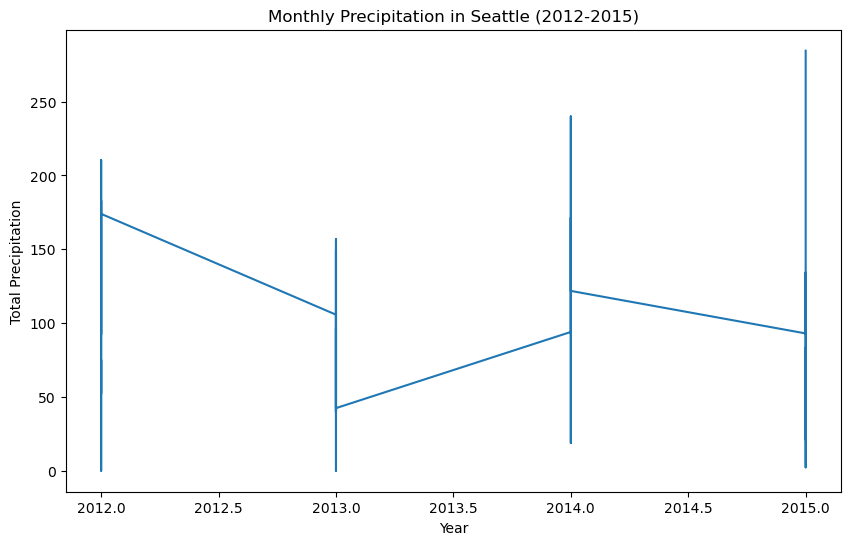

In [23]:
# Extract the year and month from the date column
wx_df['year'] = wx_df['date'].dt.year
wx_df['month'] = wx_df['date'].dt.month

# Calculate the total precipitation for each month
monthly_precip = wx_df.groupby(['year', 'month'])['precipitation'].sum().reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the monthly precipitation over time
plt.plot(monthly_precip['year'], monthly_precip['precipitation'])

# Set the x-axis label
plt.xlabel('Year')

# Set the y-axis label
plt.ylabel('Total Precipitation')

# Set the title
plt.title('Monthly Precipitation in Seattle (2012-2015)')

# Show the plot
plt.show()

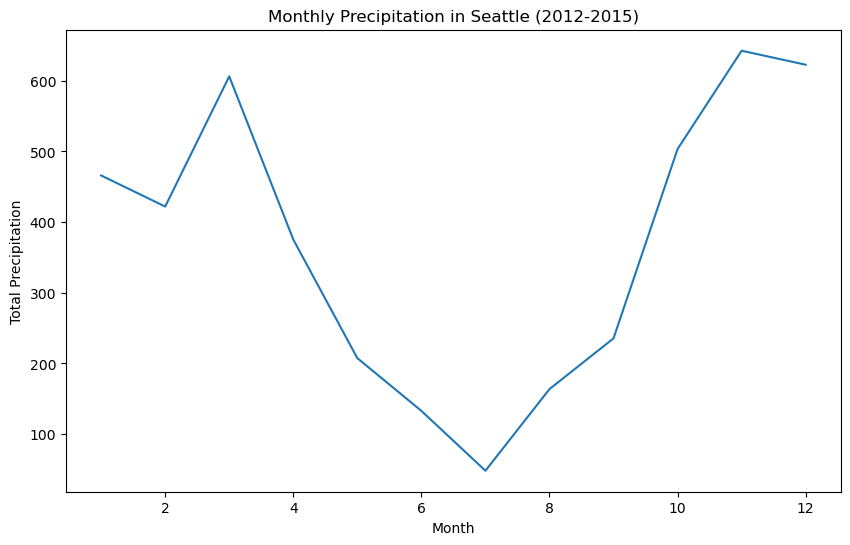

In [24]:
# Extract the year and month from the date column
wx_df['year'] = wx_df['date'].dt.year
wx_df['month'] = wx_df['date'].dt.month

# Calculate the total precipitation for each month
monthly_precip = wx_df.groupby(['month'])['precipitation'].sum().reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the monthly precipitation over time
plt.plot(monthly_precip['month'], monthly_precip['precipitation'])

# Set the x-axis label
plt.xlabel('Month')

# Set the y-axis label
plt.ylabel('Total Precipitation')

# Set the title
plt.title('Monthly Precipitation in Seattle (2012-2015)')

# Show the plot
plt.show()

In [16]:
monthly_precip.head()

,year,month,precipitation
0,2012,1,173.3
1,2012,2,92.3
2,2012,3,183.0
3,2012,4,68.1
4,2012,5,52.2


### Visualize the amount of wind over time. Choose a time interval you think is appropriate.

In [26]:
# Extract the year and month from the date column
wx_df['year'] = wx_df['date'].dt.year
wx_df['month'] = wx_df['date'].dt.month

# Resample the data by day and calculate the mean wind speed for each day
daily_wind = wx_df.resample('D', on='date')['wind'].mean().reset_index()

# Visualize the amount of wind over time
chart = alt.Chart(daily_wind).mark_line().encode(
    x='date:T',
    y='wind:Q'
).properties(
    width=800,
    height=400,
    title='Daily Wind Speed in Seattle (2012-2015)'
)

chart

alt.Chart(...)

### Which year-month combination is the windiest?

In [51]:
# Extract the year and month from the date column
wx_df['year'] = wx_df['date'].dt.year
wx_df['month'] = wx_df['date'].dt.month

# Calculate the mean wind speed for each year-month combination
monthly_wind = wx_df.groupby(['year', 'month'])['wind'].sum().reset_index()

# Find the year-month combination with the highest average wind speed
windiest_month = monthly_wind.loc[monthly_wind['wind'].idxmax(), ['year', 'month']]

# Print the year-month combination with the highest average wind speed
print('The windiest year-month combination is:', windiest_month['year'], windiest_month['month'])

The windiest year-month combination is: 2015.0 12.0


### What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [28]:
# Extract the year from the date column
wx_df['year'] = wx_df['date'].dt.year

# Count the number of days with weather == sun for each year
sunny_days = wx_df[wx_df['weather'] == 'sun'].groupby('year')['weather'].count().reset_index()

# Find the year with the highest number of sunny days
sunniest_year = sunny_days.loc[sunny_days['weather'].idxmax(), 'year']

# Print the sunniest year
print('The sunniest year is:', sunniest_year)

The sunniest year is: 2014


### In which month does it rain the most?

In [29]:
# Extract the month from the date column
wx_df['month'] = wx_df['date'].dt.month

# Calculate the total precipitation for each month
monthly_precip = wx_df.groupby('month')['precipitation'].sum().reset_index()

# Find the month with the highest total precipitation
rainiest_month = monthly_precip.loc[monthly_precip['precipitation'].idxmax(), 'month']

# Print the month with the highest total precipitation
print('The rainiest month is:', rainiest_month)

The rainiest month is: 11


### Which month has the most number of days with a non-zero amount of precipitation?

In [30]:
# Extract the month from the date column
wx_df['month'] = wx_df['date'].dt.month

# Count the number of days with a non-zero amount of precipitation for each month
precip_days = wx_df[wx_df['precipitation'] > 0].groupby('month')['precipitation'].count().reset_index()

# Find the month with the most number of days with a non-zero amount of precipitation
rainiest_month = precip_days.loc[precip_days['precipitation'].idxmax(), 'month']

# Print the month with the most number of days with a non-zero amount of precipitation
print('The month with the most number of days with a non-zero amount of precipitation is:', rainiest_month)

The month with the most number of days with a non-zero amount of precipitation is: 12


In [33]:
flt_df = data.flights_20k()
flt_df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [49]:
flt_df.describe()

,delay,distance,hour,day_of_week,month
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,11.119450,505.262400,13.574100,2.882350,2.008800
std,23.527015,356.950889,4.649235,1.966368,0.828949
min,0.000000,108.000000,0.000000,0.000000,1.000000
25%,0.000000,284.000000,10.000000,1.000000,1.000000
50%,0.000000,370.000000,14.000000,3.000000,2.000000
75%,12.000000,611.000000,17.000000,4.000000,3.000000
max,509.000000,2298.000000,23.000000,6.000000,3.000000


### Convert any negative delays to 0.

In [35]:
# Convert any negative delays to 0
flt_df['delay'] = flt_df['delay'].apply(lambda x: 0 if x < 0 else x)
flt_df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,0,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,0,550,MSY,MCO
4,2001-03-30 21:45:00,0,229,STL,IND


### Which hour of the day has the highest average delay?

In [36]:
# Extract the hour of the day from the timestamp column
flt_df['hour'] = pd.to_datetime(flt_df['date']).dt.hour

# Calculate the average delay for each hour of the day
hourly_delay = flt_df.groupby('hour')['delay'].mean().reset_index()

# Find the hour of the day with the highest average delay
busiest_hour = hourly_delay.loc[hourly_delay['delay'].idxmax(), 'hour']

# Print the hour of the day with the highest average delay
print('The hour of the day with the highest average delay is:', busiest_hour)

The hour of the day with the highest average delay is: 3


### Does the day of the week make a difference in the delay amount?

In [37]:
# Extract the day of the week from the timestamp column
flt_df['day_of_week'] = pd.to_datetime(flt_df['date']).dt.dayofweek

# Calculate the average delay for each day of the week
daily_delay = flt_df.groupby('day_of_week')['delay'].mean().reset_index()

# Define a dictionary to map day of the week to the corresponding name
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Map the day of the week values to their corresponding names
daily_delay['day_of_week'] = daily_delay['day_of_week'].map(day_map)

# Visualize the average delay by day of the week
chart = alt.Chart(daily_delay).mark_bar().encode(
    x='day_of_week:N',
    y='delay:Q'
).properties(
    width=800,
    height=400,
    title='Average Delay by Day of the Week'
)

chart

alt.Chart(...)

* Yes, Friday has more delayed flights than any other day.

### Does the month make a difference in the delay amount?

In [46]:
# Group by month and calculate mean delay
mean_delay_by_month = flt_df.groupby('month')['delay'].mean()

print(mean_delay_by_month)

month
1    11.301592
2    12.306106
3     9.875287
Name: delay, dtype: float64


In [48]:
print(flt_df['month'].unique())

[1 2 3]


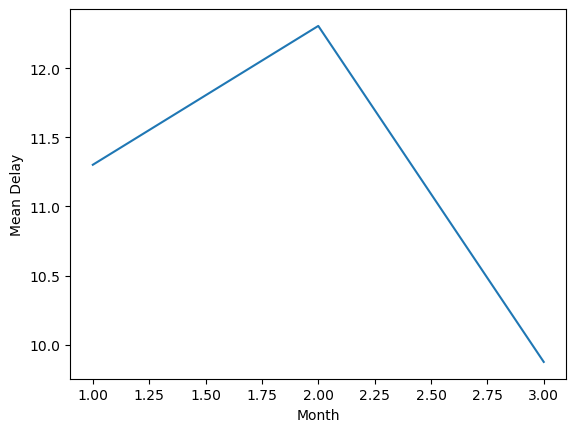

In [47]:
plt.plot(mean_delay_by_month.index, mean_delay_by_month.values)
plt.xlabel('Month')
plt.ylabel('Mean Delay')
plt.show()

In [52]:
bs_df = data.birdstrikes()
bs_df.head()

,Airport__Name,Aircraft__Make_Model,Effect__Amount_of_damage,Flight_Date,Aircraft__Airline_Operator,Origin_State,When__Phase_of_flight,Wildlife__Size,Wildlife__Species,When__Time_of_day,Cost__Other,Cost__Repair,Cost__Total_$,Speed_IAS_in_knots
0,BARKSDALE AIR FORCE BASE ARPT,T-38A,None,1/8/90 0:00,MILITARY,Louisiana,Climb,Large,Turkey vulture,Day,0,0,0,300.0
1,BARKSDALE AIR FORCE BASE ARPT,KC-10A,None,1/9/90 0:00,MILITARY,Louisiana,Approach,Medium,Unknown bird or bat,Night,0,0,0,200.0
2,BARKSDALE AIR FORCE BASE ARPT,B-52,None,1/11/90 0:00,MILITARY,Louisiana,Take-off run,Medium,Unknown bird or bat,Day,0,0,0,130.0
3,NEW ORLEANS INTL,B-737-300,Substantial,1/11/90 0:00,SOUTHWEST AIRLINES,Louisiana,Take-off run,Small,Rock pigeon,Day,0,0,0,140.0
4,BARKSDALE AIR FORCE BASE ARPT,KC-10A,None,1/12/90 0:00,MILITARY,Louisiana,Climb,Medium,Unknown bird or bat,Day,0,0,0,160.0
